# Quantifying Growth variability

In [28]:
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from ipywidgets import interact, widgets
from IPython.display import display
import branca.colormap as cm
from shapely import wkt

In [29]:
#import data
df = pd.read_csv(r'c:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\output\basis_for_growth_stability.csv')

In [30]:
df.columns

Index(['Unnamed: 0.1', 'OBJECTID', 'CUL_CAMPAN', 'CUL_ID_x', 'OSA_ID',
       'Shape_Leng', 'Shape_Area', 'layer', 'path', 'geometry', 'Unnamed: 0',
       'CUL_ID_y', 'year', 'auc', 'gdd', 'ndvi', 'doy', 'percentile', 'status',
       'pct_diff_from_P80_avg', 'pct_diff_from_P95_avg'],
      dtype='object')

In [31]:
df['geometry'] = df['geometry'].apply(wkt.loads)
df = gpd.GeoDataFrame(df, geometry='geometry')
df.set_crs("EPSG:4326", inplace=True)


,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,layer,path,geometry,...,CUL_ID_y,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,6207146,2018,923.572266,[2.14352633e+00 3.38184980e+00 4.79958865e+00 ...,[0.4980526 0.4981752 0.4982978 0.4984204 0.498...,"Index([ 32, 33, 34, 35, 36, 37, 40, 41,...",21.0,non-bearing,-50.177364,-59.659051
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,6207146,2019,802.833826,[2.76291555e+00 4.08390350e+00 5.42935321e+00 ...,[0.418858 0.419126 0.419662 0.41993 0.421...,"Index([ 32, 33, 35, 36, 37, 38, 39, 40,...",12.0,non-bearing,-56.690668,-64.932816
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,6207146,2020,715.156919,[ 9.30395851 17.41073786 24.87887332 3...,[0.2897824 0.2903328 0.2908832 0.2914336 0.291...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",7.0,non-bearing,-61.420450,-68.762478
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,6207146,2021,828.386356,[ 7.7562856 14.98012911 21.56475207 2...,[0.3588246 0.3588132 0.3588018 0.3587904 0.358...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",13.0,non-bearing,-55.312223,-63.816701
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,6207146,2022,1105.964848,[ 5.91835175 11.64991811 16.86310527 2...,[0.2914412 0.2924854 0.2935296 0.2945738 0.295...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",39.0,non-bearing,-40.338091,-51.692279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,5056,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2020,1308.877273,[ 9.30395851 17.41073786 24.87887332 3...,[0.69636461 0.69781386 0.69926311 0.70071236 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",61.0,bearing,-29.391864,-42.829215
5057,5057,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2021,1136.295767,[ 7.7562856 14.98012911 21.56475207 2...,[0.75833797 0.75883167 0.75932538 0.75981908 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",44.0,bearing,-38.701873,-50.367447
5058,5058,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2022,1182.389316,[ 5.91835175 11.64991811 16.86310527 2...,[0.44818715 0.44920113 0.45021511 0.45122909 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",49.0,bearing,-36.215330,-48.354115
5059,5059,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,6433929,2023,1485.442518,[9.83590062e-01 2.58705889e+00 5.51611595e+00 ...,[0.80115084 0.78948681 0.77782278 0.77369963 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",72.0,bearing,-19.866951,-35.116976


In [32]:
print(type(df))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [33]:
df['Growth variability [%]'] = df['pct_diff_from_P95_avg']

df['Growth variability [%]'] = df['Growth variability [%]'].where(df['Growth variability [%]']<0,0)

df['Growth variability [%]'] = df['pct_diff_from_P95_avg'].where(df['status']!='non-bearing','non-bearing')

df['Growth variability [%]'] 

df

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,layer,path,geometry,...,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,2018,923.572266,[2.14352633e+00 3.38184980e+00 4.79958865e+00 ...,[0.4980526 0.4981752 0.4982978 0.4984204 0.498...,"Index([ 32, 33, 34, 35, 36, 37, 40, 41,...",21.0,non-bearing,-50.177364,-59.659051,non-bearing
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,2019,802.833826,[2.76291555e+00 4.08390350e+00 5.42935321e+00 ...,[0.418858 0.419126 0.419662 0.41993 0.421...,"Index([ 32, 33, 35, 36, 37, 38, 39, 40,...",12.0,non-bearing,-56.690668,-64.932816,non-bearing
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,2020,715.156919,[ 9.30395851 17.41073786 24.87887332 3...,[0.2897824 0.2903328 0.2908832 0.2914336 0.291...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",7.0,non-bearing,-61.420450,-68.762478,non-bearing
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,2021,828.386356,[ 7.7562856 14.98012911 21.56475207 2...,[0.3588246 0.3588132 0.3588018 0.3587904 0.358...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",13.0,non-bearing,-55.312223,-63.816701,non-bearing
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,alqueva_almonds_terriak_selection,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",...,2022,1105.964848,[ 5.91835175 11.64991811 16.86310527 2...,[0.2914412 0.2924854 0.2935296 0.2945738 0.295...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",39.0,non-bearing,-40.338091,-51.692279,non-bearing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,5056,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2020,1308.877273,[ 9.30395851 17.41073786 24.87887332 3...,[0.69636461 0.69781386 0.69926311 0.70071236 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",61.0,bearing,-29.391864,-42.829215,-42.829215
5057,5057,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2021,1136.295767,[ 7.7562856 14.98012911 21.56475207 2...,[0.75833797 0.75883167 0.75932538 0.75981908 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",44.0,bearing,-38.701873,-50.367447,-50.367447
5058,5058,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2022,1182.389316,[ 5.91835175 11.64991811 16.86310527 2...,[0.44818715 0.44920113 0.45021511 0.45122909 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",49.0,bearing,-36.215330,-48.354115,-48.354115
5059,5059,3960341,2024,6433929,48946008,711.316223,27950.570203,Idanha_almonds_2024,C:/Users/ici-1/Desktop/NADJA/Verrio/Data/Shape...,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",...,2023,1485.442518,[9.83590062e-01 2.58705889e+00 5.51611595e+00 ...,[0.80115084 0.78948681 0.77782278 0.77369963 0...,"Index([ 32, 33, 34, 35, 36, 37, 38, 39,...",72.0,bearing,-19.866951,-35.116976,-35.116976


<Axes: xlabel='year', ylabel='Shape_Area'>

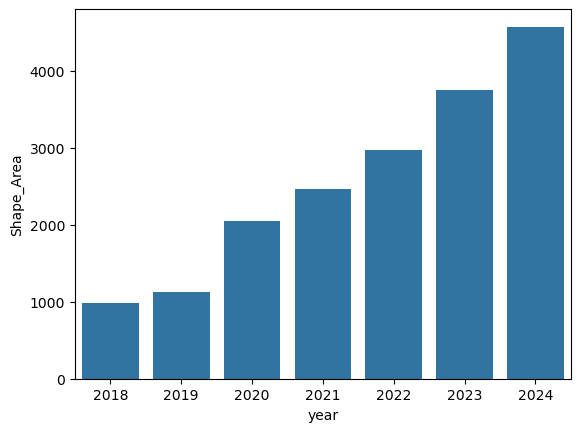

In [34]:
import seaborn as sns

# check the evolution of bearing / non-bearing
df_bearing = df[df['status']=='bearing']
test = df_bearing.groupby('year')['Shape_Area'].sum() /10000

sns.barplot(data=test)

In [35]:

df['doy'] = pd.to_numeric(df['doy'], errors='coerce')  # converts to float, NaN on failure
df['gdd'] = pd.to_numeric(df['gdd'], errors='coerce')
df['ndvi'] = pd.to_numeric(df['ndvi'], errors='coerce')
#df['Growth variability'] = pd.to_numeric(df['ndvi'], errors='coerce')

df['status'] = df['status'].astype(str)


# Drop columns not needed in GeoJson
columns_to_drop = ['layer', 'path']
df_new = df.drop(columns=columns_to_drop)

df_new['year'].unique()

array([2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype=int64)

In [36]:
df_new

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,geometry,Unnamed: 0,CUL_ID_y,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1044,6207146,2018,923.572266,NaN,NaN,NaN,21.0,non-bearing,-50.177364,-59.659051,non-bearing
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",591,6207146,2019,802.833826,NaN,NaN,NaN,12.0,non-bearing,-56.690668,-64.932816,non-bearing
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",363,6207146,2020,715.156919,NaN,NaN,NaN,7.0,non-bearing,-61.420450,-68.762478,non-bearing
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",676,6207146,2021,828.386356,NaN,NaN,NaN,13.0,non-bearing,-55.312223,-63.816701,non-bearing
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1992,6207146,2022,1105.964848,NaN,NaN,NaN,39.0,non-bearing,-40.338091,-51.692279,non-bearing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5056,5056,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",3093,6433929,2020,1308.877273,NaN,NaN,NaN,61.0,bearing,-29.391864,-42.829215,-42.829215
5057,5057,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2210,6433929,2021,1136.295767,NaN,NaN,NaN,44.0,bearing,-38.701873,-50.367447,-50.367447
5058,5058,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2480,6433929,2022,1182.389316,NaN,NaN,NaN,49.0,bearing,-36.215330,-48.354115,-48.354115
5059,5059,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",3634,6433929,2023,1485.442518,NaN,NaN,NaN,72.0,bearing,-19.866951,-35.116976,-35.116976


In [37]:
float_rows = df_new['Growth variability [%]'][df_new['Growth variability [%]'].apply(lambda x: isinstance(x, float))]

type(float_rows.iloc[0])

float

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,geometry,Unnamed: 0,CUL_ID_y,year,auc,gdd,ndvi,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1044,6207146,2018,923.572266,NaN,NaN,NaN,21.0,non-bearing,-50.177364,-59.659051,non-bearing
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",591,6207146,2019,802.833826,NaN,NaN,NaN,12.0,non-bearing,-56.690668,-64.932816,non-bearing
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",363,6207146,2020,715.156919,NaN,NaN,NaN,7.0,non-bearing,-61.420450,-68.762478,non-bearing
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",676,6207146,2021,828.386356,NaN,NaN,NaN,13.0,non-bearing,-55.312223,-63.816701,non-bearing
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1992,6207146,2022,1105.964848,NaN,NaN,NaN,39.0,non-bearing,-40.338091,-51.692279,non-bearing


# Growth Variability

Use the following script to visualize growth variability.

In [20]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.mean()
lon = centroids.x.mean()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
# all_values = df_new['Growth variability [%]']
colormap = cm.linear.RdYlGn_11.scale(float_rows.min(), float_rows.max())
colormap.caption = "Growth variability [%]"
colormap.add_to(m)

# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new['year'].unique()):
    filtered = df_new[df_new['year'] == year]

    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['Growth variability [%]'])
            if isinstance(feature['properties']['Growth variability [%]'], (int, float, np.number))
            else 'white',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["Growth variability [%]"])
    ).add_to(layer)

    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\growth_var2.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_9004\2307660742.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2018, Features: 723
Year: 2019, Features: 723
Year: 2020, Features: 723
Year: 2021, Features: 723
Year: 2022, Features: 723
Year: 2023, Features: 723
Year: 2024, Features: 723


## Year to year difference

In [38]:
# get year to year difference

# assuming df is your dataframe
df_new_diff = df_new[['CUL_ID_y', 'year', 'auc', 'geometry', 'status']].copy()

# sort by ID and year
df_new_diff = df_new_diff.sort_values(by=['CUL_ID_y', 'year'])

# group by ID and compute difference and percent change
df_new_diff['auc_diff'] = df_new_diff.groupby('CUL_ID_y')['auc'].diff()
df_new_diff['auc_pct_change'] = df_new_diff.groupby('CUL_ID_y')['auc'].pct_change() * 100

df_new_diff['auc_pct_change'] = df_new_diff['auc_pct_change'].where(df['status']!='non-bearing','non-bearing')



In [40]:


#float_rows = df_new_diff['auc_pct_change'][df_new_diff['auc_pct_change'].apply(lambda x: isinstance(x, float))]
df_new_diff['auc_pct_change']= df_new_diff['auc_pct_change'][df_new_diff['auc_pct_change'].apply(lambda x: isinstance(x, float))]


In [41]:
df_new_diff['auc_pct_change_capped'] = np.where(
    (df_new_diff['status'] != 'non-bearing') & df_new_diff['auc_pct_change'].notna(),
    df_new_diff['auc_pct_change'].clip(-100, 100),
    np.nan
)

#create a suitable colorbar
#df_new_diff['auc_pct_change_capped'] = df_new_diff['auc_pct_change'].clip(-100, 100)

# make sure
float_rows = df_new_diff['auc_pct_change_capped'][df_new_diff['auc_pct_change_capped'].apply(lambda x: isinstance(x, float))]

import branca.colormap as cm

bins = [-100, -75, -50, -25, 0, 25, 50, 75, 100]

In [42]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.mean()
lon = centroids.x.mean()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
# all_values = df_new['Growth variability [%]']
colormap = cm.StepColormap(
    colors=cm.linear.RdYlGn_11.colors,
    vmin=-100, vmax=100,
    index=bins,
    caption="Year-to-Year AUC Change [%] (↓ decrease | ↑ increase)"
)
colormap.add_to(m)


# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new_diff['year'].unique()):
    filtered = df_new_diff[df_new_diff['year'] == year]

    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': (
                colormap(feature['properties'].get('auc_pct_change_capped'))
                if pd.notnull(feature['properties'].get('auc_pct_change_capped'))
                else '#d3d3d3'  # light gray for non-bearing or missing
            ),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["auc_pct_change_capped", "status"])
    ).add_to(layer)


    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\year_to_year_change.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_9004\1173247458.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2018, Features: 723
Year: 2019, Features: 723
Year: 2020, Features: 723
Year: 2021, Features: 723
Year: 2022, Features: 723
Year: 2023, Features: 723
Year: 2024, Features: 723


# Creating a GIF

In [ ]:
import imageio.v2 as imageio
import geopandas as gpd
import folium
import json
import numpy as np
from branca.colormap import linear
from selenium import webdriver
import time

# --- Prepare your data ---
df_new = ...  # your GeoDataFrame
colormap = linear.RdYlGn_11.scale(df_new['pct_diff_from_P95_avg'].min(), df_new['pct_diff_from_P95_avg'].max())

# Get map center
centroids = df_new.geometry.centroid
lat, lon = centroids.y.mean(), centroids.x.mean()

# Temporary image list
images = []

# Set up a headless browser for screenshots
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--window-size=1200,800')
driver = webdriver.Chrome(options=options)

for year in sorted(df_new['year'].unique()):
    m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

    filtered = df_new[df_new['year'] == year]
    geojson_data = json.loads(filtered.to_json())

    folium.GeoJson(
        geojson_data,
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['pct_diff_from_P95_avg']),
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6,
        },
        tooltip=folium.GeoJsonTooltip(fields=["pct_diff_from_P95_avg"])
    ).add_to(m)

    folium.map.Marker([lat, lon], icon=folium.DivIcon(html=f"<b>{year}</b>")).add_to(m)
    m.save(f"map_{year}.html")

    # Take screenshot
    driver.get(f"file://{os.getcwd()}/map_{year}.html")
    time.sleep(1)  # wait for map to render
    driver.save_screenshot(f"map_{year}.png")
    images.append(imageio.imread(f"map_{year}.png"))

driver.quit()

# Combine into GIF
imageio.mimsave('map_animation.gif', images, duration=1)  # 1 second per frame


# Evaporation numbers

In [10]:
#import data
df_eta = pd.read_csv(r'c:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\output\eta_year_to_year.csv', index_col=0)
#shapefile.crs

In [11]:
# Step 1: Melt wide dataframe into long format
df_long = df_eta.reset_index().melt(id_vars='year', var_name='CUL_ID_x', value_name='Actual Evaporation [mm/season]')

# df_long
df_long

,year,CUL_ID_x,Actual Evaporation [mm/season]
0,2018,4099637,663.418941
1,2019,4099637,726.603851
2,2020,4099637,698.299350
3,2021,4099637,668.563778
4,2022,4099637,729.319507
...,...,...,...
2956,2020,6823944,702.118355
2957,2021,6823944,699.126323
2958,2022,6823944,711.439343
2959,2023,6823944,737.498662


In [13]:
#delete columns from df_new

df_new=df_new[['CUL_ID_x', 'geometry','year', 'status',
       'pct_diff_from_P80_avg', 'pct_diff_from_P95_avg',
       'Growth variability [%]']]

df_new

,CUL_ID_x,geometry,year,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-60.213821,-68.206070,non-bearing
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-55.336110,-64.308193,non-bearing
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-53.914551,-63.172197,non-bearing
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2018,non-bearing,-48.619093,-58.940491,non-bearing
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-38.472083,-50.831813,non-bearing
...,...,...,...,...,...,...,...
4636,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2020,bearing,-27.183498,-41.810879,-41.810879
4637,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2019,bearing,-26.745391,-41.460779,-41.460779
4638,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2018,bearing,-26.304764,-41.108665,-41.108665
4639,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2023,bearing,-17.360680,-33.961269,-33.961269


In [38]:
df_long.duplicated(subset=['CUL_ID_x', 'year']).sum()


0

In [14]:
df_new = df_new[df_new['CUL_ID_x'].notna()]
df_long = df_long[df_long['CUL_ID_x'].notna()]

df_new['CUL_ID_x'] = df_new['CUL_ID_x'].astype(int)
df_long['CUL_ID_x'] = df_long['CUL_ID_x'].astype(int)

existing_ids = df_new['CUL_ID_x'].isin(df_long['CUL_ID_x'])
print(f"Found {existing_ids.sum()} matching IDs out of {len(df_new)}")


Found 2640 matching IDs out of 4641


In [40]:
df_geo = df_new.merge(
    df_long[['CUL_ID_x', 'year', 'Actual Evaporation [mm/season]']],
    on=['CUL_ID_x', 'year'],
    how='left'
)

df_geo

,CUL_ID_x,geometry,year,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%],Actual Evaporation [mm/season]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-60.213821,-68.206070,non-bearing,NaN
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-55.336110,-64.308193,non-bearing,NaN
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-53.914551,-63.172197,non-bearing,NaN
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2018,non-bearing,-48.619093,-58.940491,non-bearing,NaN
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-38.472083,-50.831813,non-bearing,NaN
...,...,...,...,...,...,...,...,...
4636,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2020,bearing,-27.183498,-41.810879,-41.810879,720.395614
4637,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2019,bearing,-26.745391,-41.460779,-41.460779,752.122610
4638,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2018,bearing,-26.304764,-41.108665,-41.108665,680.194618
4639,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2023,bearing,-17.360680,-33.961269,-33.961269,813.408538


In [41]:
df_geo['Actual Evaporation [mm/season]'] = df_geo['Actual Evaporation [mm/season]'].where(df_geo['status']!='non-bearing','non-bearing')
df_geo

,CUL_ID_x,geometry,year,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%],Actual Evaporation [mm/season]
0,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2020,non-bearing,-60.213821,-68.206070,non-bearing,non-bearing
1,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2019,non-bearing,-55.336110,-64.308193,non-bearing,non-bearing
2,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2021,non-bearing,-53.914551,-63.172197,non-bearing,non-bearing
3,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2018,non-bearing,-48.619093,-58.940491,non-bearing,non-bearing
4,6207146,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",2022,non-bearing,-38.472083,-50.831813,non-bearing,non-bearing
...,...,...,...,...,...,...,...,...
4636,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2020,bearing,-27.183498,-41.810879,-41.810879,720.395614
4637,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2019,bearing,-26.745391,-41.460779,-41.460779,752.12261
4638,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2018,bearing,-26.304764,-41.108665,-41.108665,680.194618
4639,6433929,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",2023,bearing,-17.360680,-33.961269,-33.961269,813.408538


In [42]:
df_geo['Actual Evaporation [mm/season]']

0       non-bearing
1       non-bearing
2       non-bearing
3       non-bearing
4       non-bearing
           ...     
4636     720.395614
4637      752.12261
4638     680.194618
4639     813.408538
4640     810.768127
Name: Actual Evaporation [mm/season], Length: 4641, dtype: object

In [43]:
float_rows = df_geo['Actual Evaporation [mm/season]'][df_geo['Actual Evaporation [mm/season]'].apply(lambda x: isinstance(x, float))]

float_rows

6              NaN
11             NaN
12             NaN
17             NaN
18             NaN
           ...    
4636    720.395614
4637     752.12261
4638    680.194618
4639    813.408538
4640    810.768127
Name: Actual Evaporation [mm/season], Length: 1834, dtype: object

In [ ]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.max()
lon = centroids.x.max()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
all_values = df_geo['Actual Evaporation [mm/season]']
colormap = cm.linear.RdYlBu_11.scale(float_rows.min(), float_rows.max())
colormap.caption = "Actual Evaporation [mm/season]"
colormap.add_to(m)

# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new['year'].unique()):
    filtered = df_geo[df_geo['year'] == year]
    # Filter out problematic types
    filtered_clean = filtered.copy()

    # Drop columns with object or method types
    for col in filtered_clean.columns:
        if filtered_clean[col].apply(lambda x: isinstance(x, (dict, list, set, tuple, complex, type(filtered_clean[col])))).any():
            print(f"Dropping problematic column: {col}")
            filtered_clean.drop(columns=col, inplace=True)

    # Convert to JSON
    geojson_data = json.loads(filtered_clean.to_json())


    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    #geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['Actual Evaporation [mm/season]'])
            if isinstance(feature['properties']['Actual Evaporation [mm/season]'], (int, float))
            else 'white',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=["Actual Evaporation [mm/season]"])
    ).add_to(layer)

    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\ET_actual.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_10984\189182680.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2018, Features: 670
Year: 2019, Features: 702
Year: 2020, Features: 667
Year: 2021, Features: 651
Year: 2022, Features: 674
Year: 2023, Features: 613
Year: 2024, Features: 664


# Crop stress normalized

In [50]:
df_stress = pd.read_csv(r'c:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\output\stress_normalized.csv', index_col=0)


In [40]:
df_stress.head()

,4099637,4099686,4099693,4646223,4646224,4646229,4646232,4646233,4646242,4646243,...,6823927,6823928,6823929,6823932,6823933,6823934,6823938,6823942,6823943,6823944
year,,,,,,,,,,,,,,,,,,,,,
2018,0.349763,0.371242,0.030703,0.364026,0.438456,0.213322,0.328544,0.272817,1.000000,0.788650,...,0.136268,0.442891,0.000000,0.056350,0.122498,0.000000,0.112740,0.248303,0.137102,0.000000
2019,0.571375,0.623489,0.207675,0.360030,0.447660,0.275651,0.342568,0.295121,0.492121,0.711696,...,0.528672,0.828866,0.537876,0.653274,0.748761,0.714084,0.673267,0.700085,0.575141,0.705204
2020,0.643695,0.794511,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.916079,1.000000,...,0.047666,0.000000,0.075123,0.074036,0.014621,0.039927,0.000000,0.069325,0.071715,0.261914
2021,1.000000,1.000000,0.334817,0.675196,0.652397,0.230299,0.279978,0.223925,0.208531,0.306396,...,0.237304,0.549740,0.256225,0.406080,0.420127,0.312669,0.329288,0.349518,0.314912,0.323771
2022,0.888300,0.936139,1.000000,0.369434,0.403541,0.283314,0.308222,0.283598,0.297996,0.405588,...,0.652395,0.830450,0.736721,0.688450,0.929243,0.741635,0.882932,0.797079,0.733379,0.835063


In [51]:
# Step 1: Melt wide dataframe into long format
df_stress_long = df_stress.reset_index().melt(id_vars='year', var_name='CUL_ID_x', value_name='Stress normalized [-]')

# df_long
df_stress_long.head()

,year,CUL_ID_x,Stress normalized [-]
0,2018,4099637,0.349763
1,2019,4099637,0.571375
2,2020,4099637,0.643695
3,2021,4099637,1.000000
4,2022,4099637,0.888300


In [60]:
df_stress_long.shape

(2961, 3)

In [53]:
df_stress_long['CUL_ID_x'] = df_stress_long['CUL_ID_x'].astype(int)

df_geo2 = df_geo.merge(df_stress_long, on='CUL_ID_x', how='left')

df_geo2.shape

(131361, 24)

In [47]:

df_geo2

,Unnamed: 0.1,OBJECTID,CUL_CAMPAN,CUL_ID_x,OSA_ID,Shape_Leng,Shape_Area,geometry,Unnamed: 0,CUL_ID_y,...,doy,percentile,status,pct_diff_from_P80_avg,pct_diff_from_P95_avg,Growth variability [%],year_y,Actual Evaporation [mm/day],year,Stress normalized [-]
0,0,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",350,6207146,...,NaN,8.0,non-bearing,-60.213821,-68.206070,non-bearing,NaN,NaN,NaN,NaN
1,1,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",568,6207146,...,NaN,12.0,non-bearing,-55.336110,-64.308193,non-bearing,NaN,NaN,NaN,NaN
2,2,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",649,6207146,...,NaN,14.0,non-bearing,-53.914551,-63.172197,non-bearing,NaN,NaN,NaN,NaN
3,3,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1010,6207146,...,NaN,22.0,non-bearing,-48.619093,-58.940491,non-bearing,NaN,NaN,NaN,NaN
4,4,25737,2024,6207146,9164476,1331.235358,102332.206794,"MULTIPOLYGON (((-7.85659 38.0506, -7.85588 38....",1941,6207146,...,NaN,42.0,non-bearing,-38.472083,-50.831813,non-bearing,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131356,4640,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",4310,6433929,...,NaN,93.0,bearing,2.005544,-18.485332,-18.485332,2024.0,810.768127,2020.0,0.680718
131357,4640,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",4310,6433929,...,NaN,93.0,bearing,2.005544,-18.485332,-18.485332,2024.0,810.768127,2021.0,0.835650
131358,4640,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",4310,6433929,...,NaN,93.0,bearing,2.005544,-18.485332,-18.485332,2024.0,810.768127,2022.0,1.000000
131359,4640,3960341,2024,6433929,48946008,711.316223,27950.570203,"MULTIPOLYGON (((-7.21549 39.87413, -7.21553 39...",4310,6433929,...,NaN,93.0,bearing,2.005544,-18.485332,-18.485332,2024.0,810.768127,2023.0,0.603118


In [ ]:
# Your GeoDataFrame must have these columns
# - 'geometry' (valid geometries)
# - 'year'
# - 'pct_diff_from_P95_avg'

from folium import Element
import json

# Get center of map from entire dataset
centroids = df_new.geometry.centroid
lat = centroids.y.max()
lon = centroids.x.max()

# Create base map
m = folium.Map(location=[lat, lon], zoom_start=13, tiles="CartoDB positron")

# Colormap setup
all_values = df_geo2['Stress normalized [-]']
colormap = cm.linear.RdYlGn_11.scale(all_values.min(), all_values.max())
colormap.caption = "Stress normalized [-]"
colormap.add_to(m)

# Dictionary to keep layers by year
year_layers = {}

for year in sorted(df_new['year'].unique()):
    filtered = df_geo2[df_geo2['year_y'] == year]

    # Filter out problematic types
    filtered_clean = filtered.copy()

    # Drop columns with object or method types
    for col in filtered_clean.columns:
        if filtered_clean[col].apply(lambda x: isinstance(x, (dict, list, set, tuple, complex, type(filtered_clean[col])))).any():
            print(f"Dropping problematic column: {col}")
            filtered_clean.drop(columns=col, inplace=True)

    # Convert to JSON
    geojson_data = json.loads(filtered_clean.to_json())


    print(f"Year: {year}, Features: {len(filtered)}")

    layer = folium.FeatureGroup(name=str(year), show=False)

    #geojson_data = json.loads(filtered.to_json())  # Ensures correct format

    folium.GeoJson(
        data=geojson_data,
        name=f"Fields {year}",
        style_function=lambda feature: {
            'fillColor': colormap(feature['properties']['Stress normalized [-]'])
            if isinstance(feature['properties']['Stress normalized [-]'], (int, float))
            else 'white',
            'color': 'black',
            'weight': 1,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=['Stress normalized [-]'])
    ).add_to(layer)

    # Add this:
    layer.add_to(m)
    year_layers[year] = layer

# Activate only the first year
first_year = sorted(year_layers.keys())[0]
m.add_child(year_layers[first_year])
#year_layers[first_year].show = True

# Layer control
folium.LayerControl(collapsed=False).add_to(m)

# Create the dropdown HTML separately
dropdown_options = ''.join([f'<option value="{year}">{year}</option>' for year in sorted(year_layers.keys())])

dropdown_script = """
<select id="yearDropdown" onchange="switchYear(this.value)"
        style="position: fixed; top: 10px; left: 50px; z-index: 9999;">
  {options}
</select>

<script>
    function switchYear(year) {{
        const yearLayers = {years};
        map.eachLayer(function(layer) {{
            if (layer.options && layer.options.name && yearLayers.includes(layer.options.name)) {{
                if (layer.options.name === year) {{
                    map.addLayer(layer);
                }} else {{
                    map.removeLayer(layer);
                }}
            }}
        }});
    }}
</script>
""".format(
    options=dropdown_options,
    years=str([str(y) for y in year_layers.keys()])  # safely embed year list as JS array
)

# Add to map
m.get_root().html.add_child(Element(dropdown_script))
m.save(r"C:\Users\ici-1\Desktop\NADJA\Verrio\almond_water_use_data\HTML\stress_normalized.html")


C:\Users\ici-1\AppData\Local\Temp\ipykernel_19416\3398860213.py:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = df_new.geometry.centroid


Year: 2018, Features: 18480
Year: 2019, Features: 18480
Year: 2020, Features: 18480
Year: 2021, Features: 18480
Year: 2022, Features: 18480
Year: 2023, Features: 18480
Year: 2024, Features: 18480
